In [170]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [171]:
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-08", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [172]:
data = data.reset_index('Date', inplace=False)

In [173]:
# Chuyển cột 'Date' thành kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sắp xếp dữ liệu theo thứ tự tăng dần của cột 'Date'
data.sort_values(by='Date', inplace=True)

# Chuyển cột 'Date' thành mảng numpy
dates = data['Date'].values

# Chuyển cột 'Close' thành mảng numpy
close_prices = data['Close'].values

In [174]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [175]:
train_dates = train_data['Date'].values
train_close_prices = train_data['Close'].values
val_dates = val_data['Date'].values
val_close_prices = val_data['Close'].values
test_dates = test_data['Date'].values
test_close_prices = test_data['Close'].values

In [176]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values

In [177]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [178]:
# Xác định kiến trúc của mạng Bayesian Neural Network
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [179]:
# Xác định hàm mất mát và bộ tối ưu hóa
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [180]:
# Khởi tạo mô hình BNN
model = BNN(input_size=1, output_size=1)

In [181]:
# Huấn luyện mô hình BNN
for epoch in range(num_epochs):
    model.train()
    
    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)
    
    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)
    
    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


Epoch [100/1000], Loss: 943990.25
Epoch [200/1000], Loss: 1036146.6875
Epoch [300/1000], Loss: 342537.03125
Epoch [400/1000], Loss: 1184584.625
Epoch [500/1000], Loss: 835024.4375
Epoch [600/1000], Loss: 394112.84375
Epoch [700/1000], Loss: 937924.5625
Epoch [800/1000], Loss: 439011.125
Epoch [900/1000], Loss: 986596.25
Epoch [1000/1000], Loss: 638235.875


In [182]:
# Dự đoán trên tập test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [183]:
# Dự đoán trên tập validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [184]:
# In kết quả dự đoán trên tập test
print('Kết quả dự đoán trên tập test:')
for i in range(len(test_dates)):
    print(f'Date: {test_dates[i]}, Predicted Close: {y_pred_test[i].item()}')

Kết quả dự đoán trên tập test:
Date: 971, Predicted Close: 1559.531982421875
Date: 972, Predicted Close: 1561.128662109375
Date: 973, Predicted Close: 1562.7254638671875
Date: 974, Predicted Close: 1564.3223876953125
Date: 975, Predicted Close: 1565.9190673828125
Date: 976, Predicted Close: 1567.5159912109375
Date: 977, Predicted Close: 1569.1126708984375
Date: 978, Predicted Close: 1570.7095947265625
Date: 979, Predicted Close: 1572.3065185546875
Date: 980, Predicted Close: 1573.9031982421875
Date: 981, Predicted Close: 1575.5
Date: 982, Predicted Close: 1577.0968017578125
Date: 983, Predicted Close: 1578.6937255859375
Date: 984, Predicted Close: 1580.2904052734375
Date: 985, Predicted Close: 1581.88720703125
Date: 986, Predicted Close: 1583.484130859375
Date: 987, Predicted Close: 1585.0809326171875
Date: 988, Predicted Close: 1586.6776123046875
Date: 989, Predicted Close: 1588.2745361328125
Date: 990, Predicted Close: 1589.8714599609375
Date: 991, Predicted Close: 1591.4681396484375

In [185]:
# In kết quả dự đoán trên tập validation
print('Kết quả dự đoán trên tập validation:')
for i in range(len(val_dates)):
    print(f'Date: {val_dates[i]}, Predicted Close: {y_pred_val[i].item()}')


Kết quả dự đoán trên tập validation:
Date: 1248, Predicted Close: 2001.8482666015625
Date: 1249, Predicted Close: 2003.445068359375
Date: 1250, Predicted Close: 2005.0419921875
Date: 1251, Predicted Close: 2006.6387939453125
Date: 1252, Predicted Close: 2008.2357177734375
Date: 1253, Predicted Close: 2009.832275390625
Date: 1254, Predicted Close: 2011.4293212890625
Date: 1255, Predicted Close: 2013.0260009765625
Date: 1256, Predicted Close: 2014.622802734375
Date: 1257, Predicted Close: 2016.2196044921875
Date: 1258, Predicted Close: 2017.8162841796875
Date: 1259, Predicted Close: 2019.413330078125
Date: 1260, Predicted Close: 2021.010009765625
Date: 1261, Predicted Close: 2022.6068115234375
Date: 1262, Predicted Close: 2024.20361328125
Date: 1263, Predicted Close: 2025.800537109375
Date: 1264, Predicted Close: 2027.3973388671875
Date: 1265, Predicted Close: 2028.9942626953125
Date: 1266, Predicted Close: 2030.5909423828125
Date: 1267, Predicted Close: 2032.187744140625
Date: 1268, Pre

In [186]:
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
#x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()
# Dự đoán giá đóng cửa cho 30 ngày tiếp theo
model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'Date: {x_next_30_days[i]}, Predicted Close: {y_pred_next[i]}')

Date: tensor([1388.]), Predicted Close: 2225.401611328125
Date: tensor([1389.]), Predicted Close: 2226.99853515625
Date: tensor([1390.]), Predicted Close: 2228.595458984375
Date: tensor([1391.]), Predicted Close: 2230.192138671875
Date: tensor([1392.]), Predicted Close: 2231.789306640625
Date: tensor([1393.]), Predicted Close: 2233.385986328125
Date: tensor([1394.]), Predicted Close: 2234.982666015625
Date: tensor([1395.]), Predicted Close: 2236.57958984375
Date: tensor([1396.]), Predicted Close: 2238.17626953125
Date: tensor([1397.]), Predicted Close: 2239.773193359375
Date: tensor([1398.]), Predicted Close: 2241.3701171875
Date: tensor([1399.]), Predicted Close: 2242.966796875
Date: tensor([1400.]), Predicted Close: 2244.563720703125
Date: tensor([1401.]), Predicted Close: 2246.160400390625
Date: tensor([1402.]), Predicted Close: 2247.757080078125
Date: tensor([1403.]), Predicted Close: 2249.354248046875
Date: tensor([1404.]), Predicted Close: 2250.950927734375
Date: tensor([1405.]),

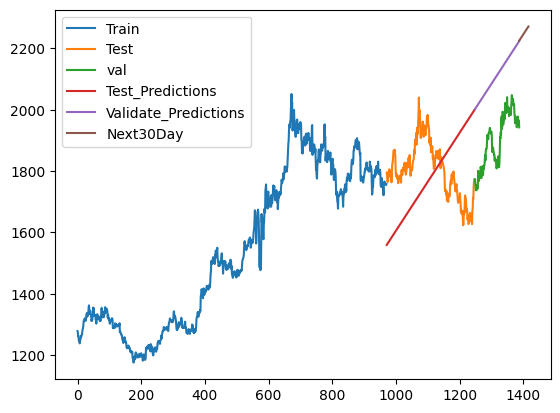

In [187]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()